   order_id  customer_id  order_value order_date     category
0         1           18   470.781139 2023-01-01     Clothing
1         2           32   412.938796 2023-01-02     Clothing
2         3           41   445.849684 2023-01-03  Electronics
3         4            6   438.141378 2023-01-04     Clothing
4         5           18   366.253921 2023-01-05  Electronics


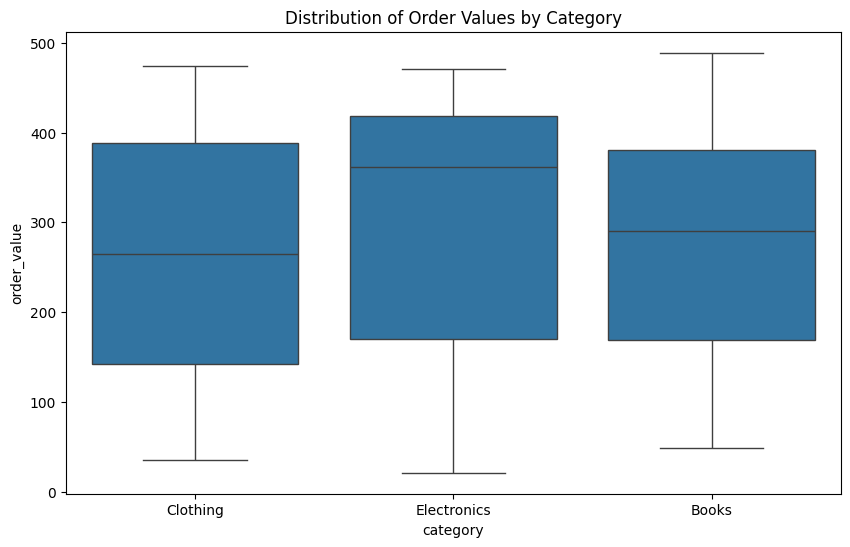

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated dataset of customer orders
data = pd.DataFrame({
    'order_id': range(1, 101),
    'customer_id': np.random.randint(1, 50, size=100),
    'order_value': np.random.uniform(10, 500, size=100),
    'order_date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'category': np.random.choice(['Electronics', 'Clothing', 'Books'], size=100)
})

# View the data
print(data.head())

# Data visualization: Distribution of order values by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='order_value', data=data)
plt.title('Distribution of Order Values by Category')
plt.show()

   order_id  customer_id  order_value order_date  category
0         1           47   338.587125 2023-01-01  Clothing
1         2           35   380.720757 2023-01-02     Books
2         3           21    35.521360 2023-01-03  Clothing
3         4           40   465.809220 2023-01-04     Books
4         5           36   569.140644 2023-01-05     Books


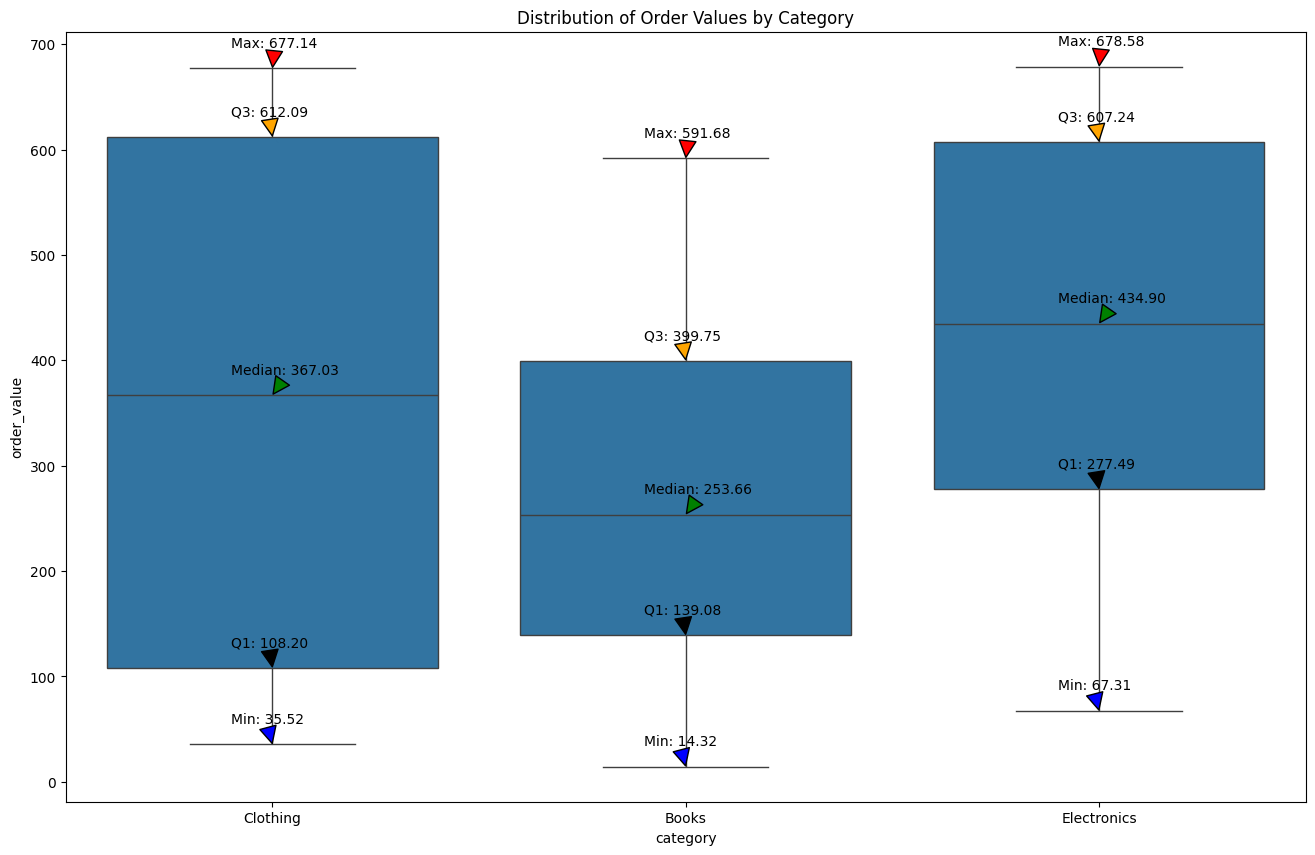

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated dataset of customer orders
data = pd.DataFrame({
    'order_id': range(1, 101),
    'customer_id': np.random.randint(1, 50, size=100),
    'order_value': np.random.uniform(10, 700, size=100),
    'order_date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'category': np.random.choice(['Electronics', 'Clothing', 'Books'], size=100)
})

print(data.head())
# Data visualization: Distribution of order values by category
plt.figure(figsize=(16, 10))
ax = sns.boxplot(x='category', y='order_value', data=data)
plt.title('Distribution of Order Values by Category')

# Calculate the statistics for each category
categories = data['category'].unique()

for category in categories:
    cat_data = data[data['category'] == category]['order_value']
    
    # Calculate statistics
    min_val = np.min(cat_data)
    q1 = np.percentile(cat_data, 25)
    median = np.percentile(cat_data, 50)
    q3 = np.percentile(cat_data, 75)
    max_val = np.max(cat_data)
    
    # Find position of category in x-axis
    x_pos = list(categories).index(category)
    
    # Annotate the plot
    ax.annotate(f'Min: {min_val:.2f}', xy=(x_pos, min_val), xytext=(x_pos - 0.1, min_val + 20),
                arrowprops=dict(facecolor='blue', shrink=0.05))
    ax.annotate(f'Q1: {q1:.2f}', xy=(x_pos, q1), xytext=(x_pos - 0.1, q1 + 20),
                arrowprops=dict(facecolor='black', shrink=0.05))
    ax.annotate(f'Median: {median:.2f}', xy=(x_pos, median), xytext=(x_pos - 0.1, median + 20),
                arrowprops=dict(facecolor='green', shrink=0.05))
    ax.annotate(f'Q3: {q3:.2f}', xy=(x_pos, q3), xytext=(x_pos - 0.1, q3 + 20),
                arrowprops=dict(facecolor='orange', shrink=0.05))
    ax.annotate(f'Max: {max_val:.2f}', xy=(x_pos, max_val), xytext=(x_pos - 0.1, max_val + 20),
                arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

In [103]:
from scipy.stats import ttest_ind

# Split the data into two groups based on category
electronics_orders = data[data['category'] == 'Electronics']['order_value']
books_orders = data[data['category'] == 'Books']['order_value']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(electronics_orders, books_orders)

# Output the t-statistic and p-value
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("The result is statistically significant at the 95% confidence level.")
else:
    print("The result is not statistically significant at the 95% confidence level.")

T-statistic: 3.309445487431464, P-value: 0.0014461742527749925
The result is statistically significant at the 95% confidence level.
